<a href="https://colab.research.google.com/github/surajsg1984/Metro-Failure-Detection-System-Using-Machine-Learning-and-Big-Data-Tools/blob/main/Metro_Failure_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset from GitHub (raw link)
url = "/content/drive/MyDrive/MetroPT3.csv"
df = pd.read_csv(url, encoding="ISO-8859-1")  # or try other encodings

# Display first 5 rows
df.head()

# Check the actual column names
print(df.columns)


Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')


In [ ]:
failure_periods = [
    ("4/18/2020 00:00", "4/18/2020 23:59"),
    ("5/29/2020 23:30", "5/30/2020 6:00"),
    ("6/5/2020 10:00", "6/7/2020 14:30"),
    ("7/15/2020 14:30", "7/15/2020 19:00"),
]
failure_windows = [(pd.to_datetime(s), pd.to_datetime(e)) for s, e in failure_periods]
df['timestamp'] = pd.to_datetime(df['timestamp'])
def assign_status(ts):
    for start, end in failure_windows:
        if start <= ts <= end:
            return 0  # failure
    return 1  # working
df['status'] = df['timestamp'].apply(assign_status)
print(df[['timestamp', 'status']])


                  timestamp  status
0       2020-02-01 00:00:00       1
1       2020-02-01 00:00:10       1
2       2020-02-01 00:00:19       1
3       2020-02-01 00:00:29       1
4       2020-02-01 00:00:39       1
...                     ...     ...
1516943 2020-09-01 03:59:10       1
1516944 2020-09-01 03:59:20       1
1516945 2020-09-01 03:59:30       1
1516946 2020-09-01 03:59:40       1
1516947 2020-09-01 03:59:50       1

[1516948 rows x 2 columns]


In [ ]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses', 'status'],
      dtype='object')

In [ ]:
# Null values count for all columns
null_counts = df.isnull().sum()
print(null_counts)
# Percentage of null values for all columns
null_percent = df.isnull().mean() * 100
# Combine both into a single DataFrame
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null %': null_percent
})
print(null_summary)

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
status             0
dtype: int64
                 Null Count  Null %
Unnamed: 0                0     0.0
timestamp                 0     0.0
TP2                       0     0.0
TP3                       0     0.0
H1                        0     0.0
DV_pressure               0     0.0
Reservoirs                0     0.0
Oil_temperature           0     0.0
Motor_current             0     0.0
COMP                      0     0.0
DV_eletric                0     0.0
Towers                    0     0.0
MPG                       0     0.0
LPS                       0     0.0
Pressure_switch           0     0.0
Oil_level                 0     0

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['status'].value_counts()

,count
status,
1,1486994
0,29954


In [ ]:
status_percentage = df['status'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
status_percentage

,proportion
status,
1,98.03%
0,1.97%


In [ ]:
# Show first 10 rows where status is 0
df_failure = df[df['status'] == 0]
print(df_failure.head(10))

        Unnamed: 0           timestamp    TP2    TP3     H1  DV_pressure  \
562564     5625640 2020-04-18 00:00:01 -0.018  8.248  8.238       -0.024   
562565     5625650 2020-04-18 00:00:13 -0.018  8.248  8.238       -0.024   
562566     5625660 2020-04-18 00:00:24 -0.018  8.248  8.238       -0.024   
562567     5625670 2020-04-18 00:00:36 -0.018  8.248  8.238       -0.024   
562568     5625680 2020-04-18 00:00:49 -0.018  8.248  8.238       -0.024   
562569     5625690 2020-04-18 00:01:01 -0.018  8.248  8.238       -0.024   
562570     5625700 2020-04-18 00:01:13 -0.018  8.248  8.238       -0.024   
562571     5625710 2020-04-18 00:01:25 -0.018  8.248  8.238       -0.024   
562572     5625720 2020-04-18 00:01:37 -0.018  8.248  8.238       -0.024   
562573     5625730 2020-04-18 00:01:49 -0.018  8.248  8.238       -0.024   

        Reservoirs  Oil_temperature  Motor_current  COMP  DV_eletric  Towers  \
562564       8.248            49.45           0.04   1.0         0.0     1.0   
562

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses', 'status'],
      dtype='object')


In [ ]:
df.shape

(1516948, 18)

In [ ]:
df.size # 1516948 * 18

27305064

In [ ]:
df.head(5)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Unnamed: 0       1516948 non-null  int64         
 1   timestamp        1516948 non-null  datetime64[ns]
 2   TP2              1516948 non-null  float64       
 3   TP3              1516948 non-null  float64       
 4   H1               1516948 non-null  float64       
 5   DV_pressure      1516948 non-null  float64       
 6   Reservoirs       1516948 non-null  float64       
 7   Oil_temperature  1516948 non-null  float64       
 8   Motor_current    1516948 non-null  float64       
 9   COMP             1516948 non-null  float64       
 10  DV_eletric       1516948 non-null  float64       
 11  Towers           1516948 non-null  float64       
 12  MPG              1516948 non-null  float64       
 13  LPS              1516948 non-null  float64       
 14  Pr

In [ ]:
# Convert float to int to digital columns
columns_to_convert = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']


for col in columns_to_convert:
    df[col] = df[col].fillna(0).astype(int)

print(df[columns_to_convert].dtypes)


COMP               int64
DV_eletric         int64
Towers             int64
MPG                int64
LPS                int64
Pressure_switch    int64
Oil_level          int64
Caudal_impulses    int64
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Unnamed: 0       1516948 non-null  int64         
 1   timestamp        1516948 non-null  datetime64[ns]
 2   TP2              1516948 non-null  float64       
 3   TP3              1516948 non-null  float64       
 4   H1               1516948 non-null  float64       
 5   DV_pressure      1516948 non-null  float64       
 6   Reservoirs       1516948 non-null  float64       
 7   Oil_temperature  1516948 non-null  float64       
 8   Motor_current    1516948 non-null  float64       
 9   COMP             1516948 non-null  int64         
 10  DV_eletric       1516948 non-null  int64         
 11  Towers           1516948 non-null  int64         
 12  MPG              1516948 non-null  int64         
 13  LPS              1516948 non-null  int64         
 14  Pr

In [ ]:
print(df.describe(include='all'))

         Unnamed: 0                      timestamp           TP2  \
count  1.516948e+06                        1516948  1.516948e+06   
mean   7.584735e+06  2020-05-16 22:58:36.631517184  1.367826e+00   
min    0.000000e+00            2020-02-01 00:00:00 -3.200000e-02   
25%    3.792368e+06     2020-03-23 05:05:04.500000 -1.400000e-02   
50%    7.584735e+06            2020-05-17 08:07:06 -1.200000e-02   
75%    1.137710e+07     2020-07-10 03:07:27.500000 -1.000000e-02   
max    1.516947e+07            2020-09-01 03:59:50  1.067600e+01   
std    4.379053e+06                            NaN  3.250930e+00   

                TP3            H1   DV_pressure    Reservoirs  \
count  1.516948e+06  1.516948e+06  1.516948e+06  1.516948e+06   
mean   8.984611e+00  7.568155e+00  5.595619e-02  8.985233e+00   
min    7.300000e-01 -3.600000e-02 -3.200000e-02  7.120000e-01   
25%    8.492000e+00  8.254000e+00 -2.200000e-02  8.494000e+00   
50%    8.960000e+00  8.784000e+00 -2.000000e-02  8.960000e+00 

In [ ]:
df.drop('Unnamed: 0',axis =1, inplace=True)

In [ ]:
for col in df.columns:
    print(col,df[col].nunique())

timestamp 1516948
TP2 5257
TP3 3683
H1 2665
DV_pressure 2257
Reservoirs 3682
Oil_temperature 2462
Motor_current 1809
COMP 2
DV_eletric 2
Towers 2
MPG 2
LPS 2
Pressure_switch 2
Oil_level 2
Caudal_impulses 2
status 2


In [ ]:
df.shape

(1516948, 17)

In [ ]:
df.columns

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses',
       'status'],
      dtype='object')

In [ ]:
df.shape

(1516948, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   timestamp        1516948 non-null  datetime64[ns]
 1   TP2              1516948 non-null  float64       
 2   TP3              1516948 non-null  float64       
 3   H1               1516948 non-null  float64       
 4   DV_pressure      1516948 non-null  float64       
 5   Reservoirs       1516948 non-null  float64       
 6   Oil_temperature  1516948 non-null  float64       
 7   Motor_current    1516948 non-null  float64       
 8   COMP             1516948 non-null  int64         
 9   DV_eletric       1516948 non-null  int64         
 10  Towers           1516948 non-null  int64         
 11  MPG              1516948 non-null  int64         
 12  LPS              1516948 non-null  int64         
 13  Pressure_switch  1516948 non-null  int64         
 14  Oi

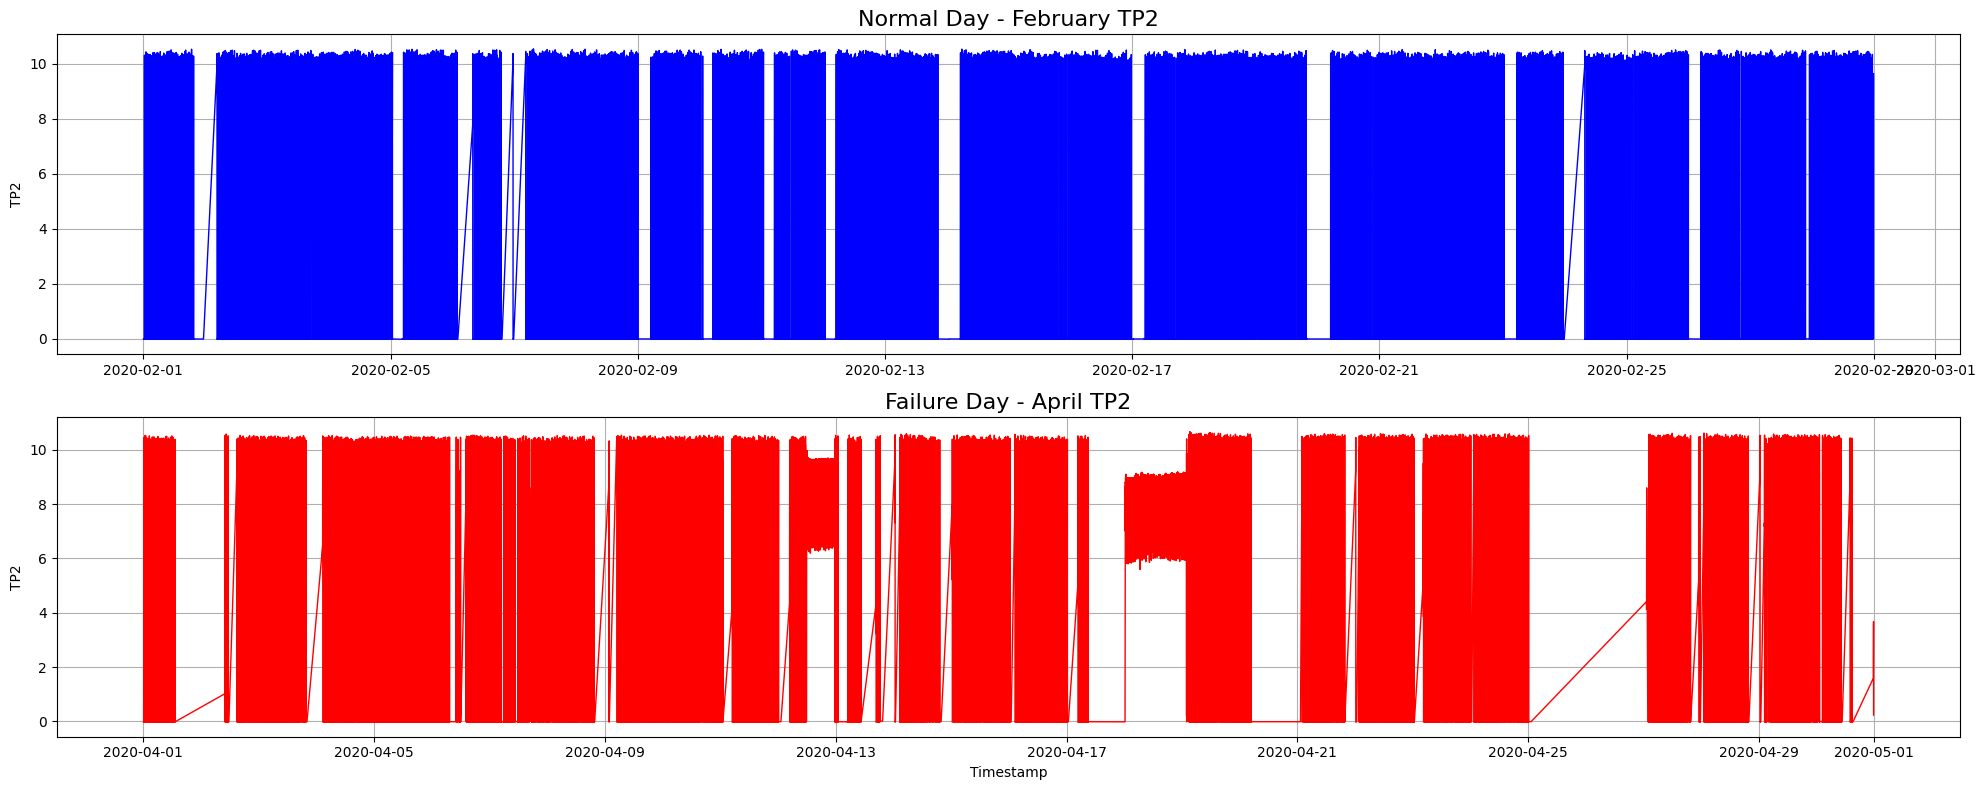

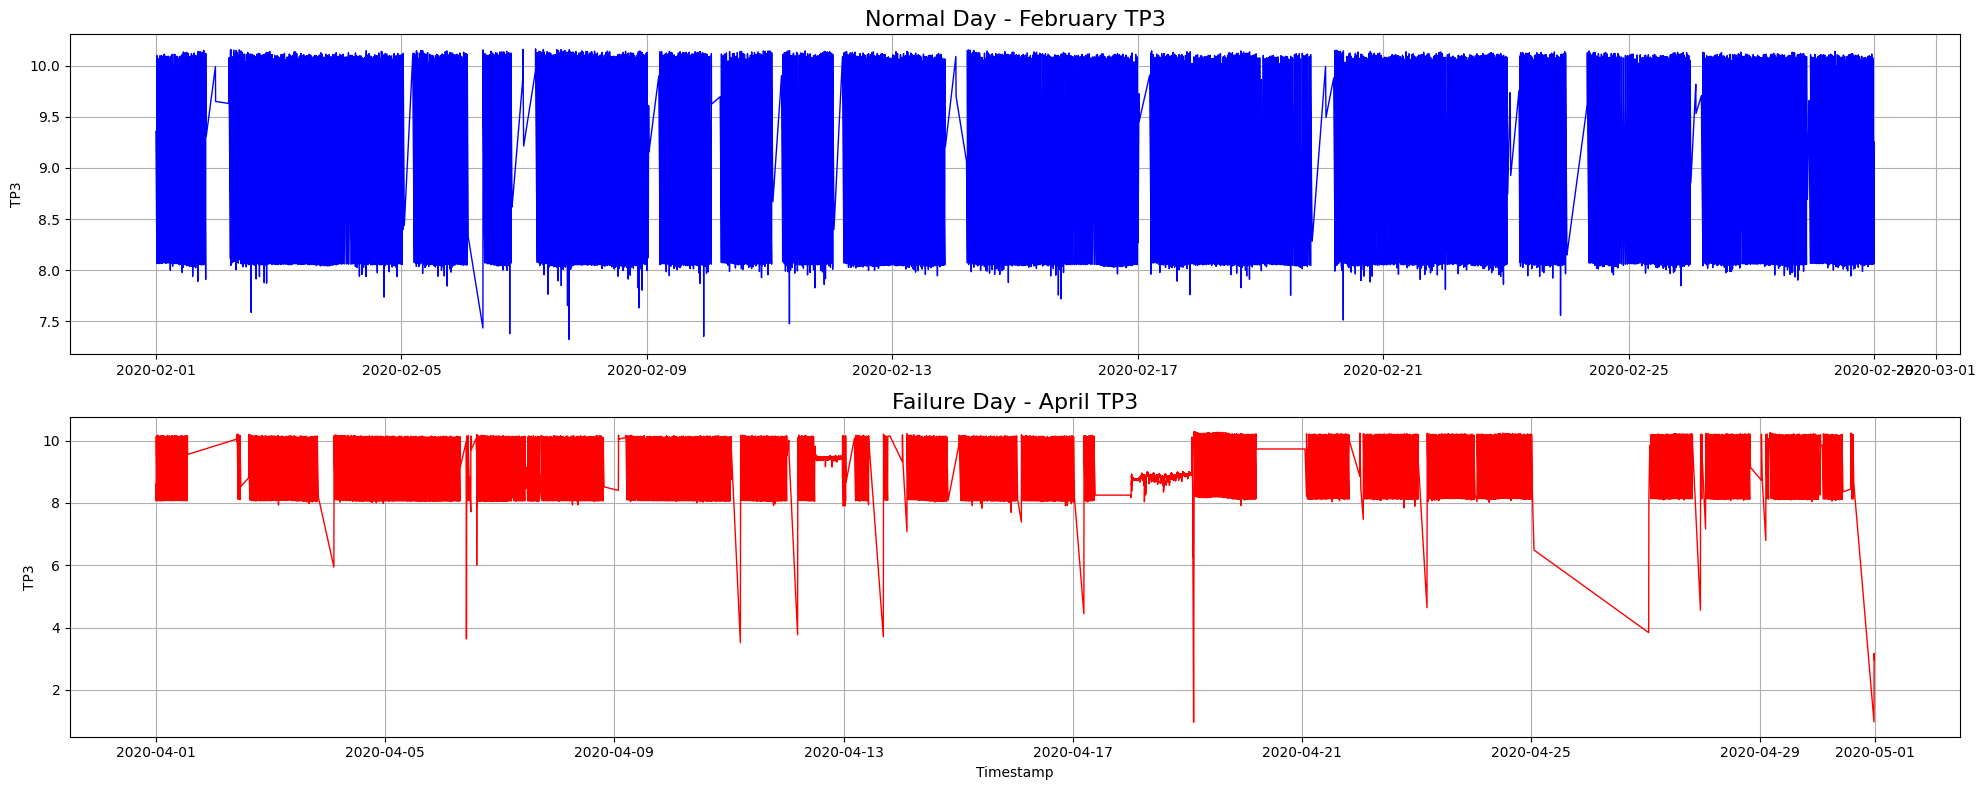

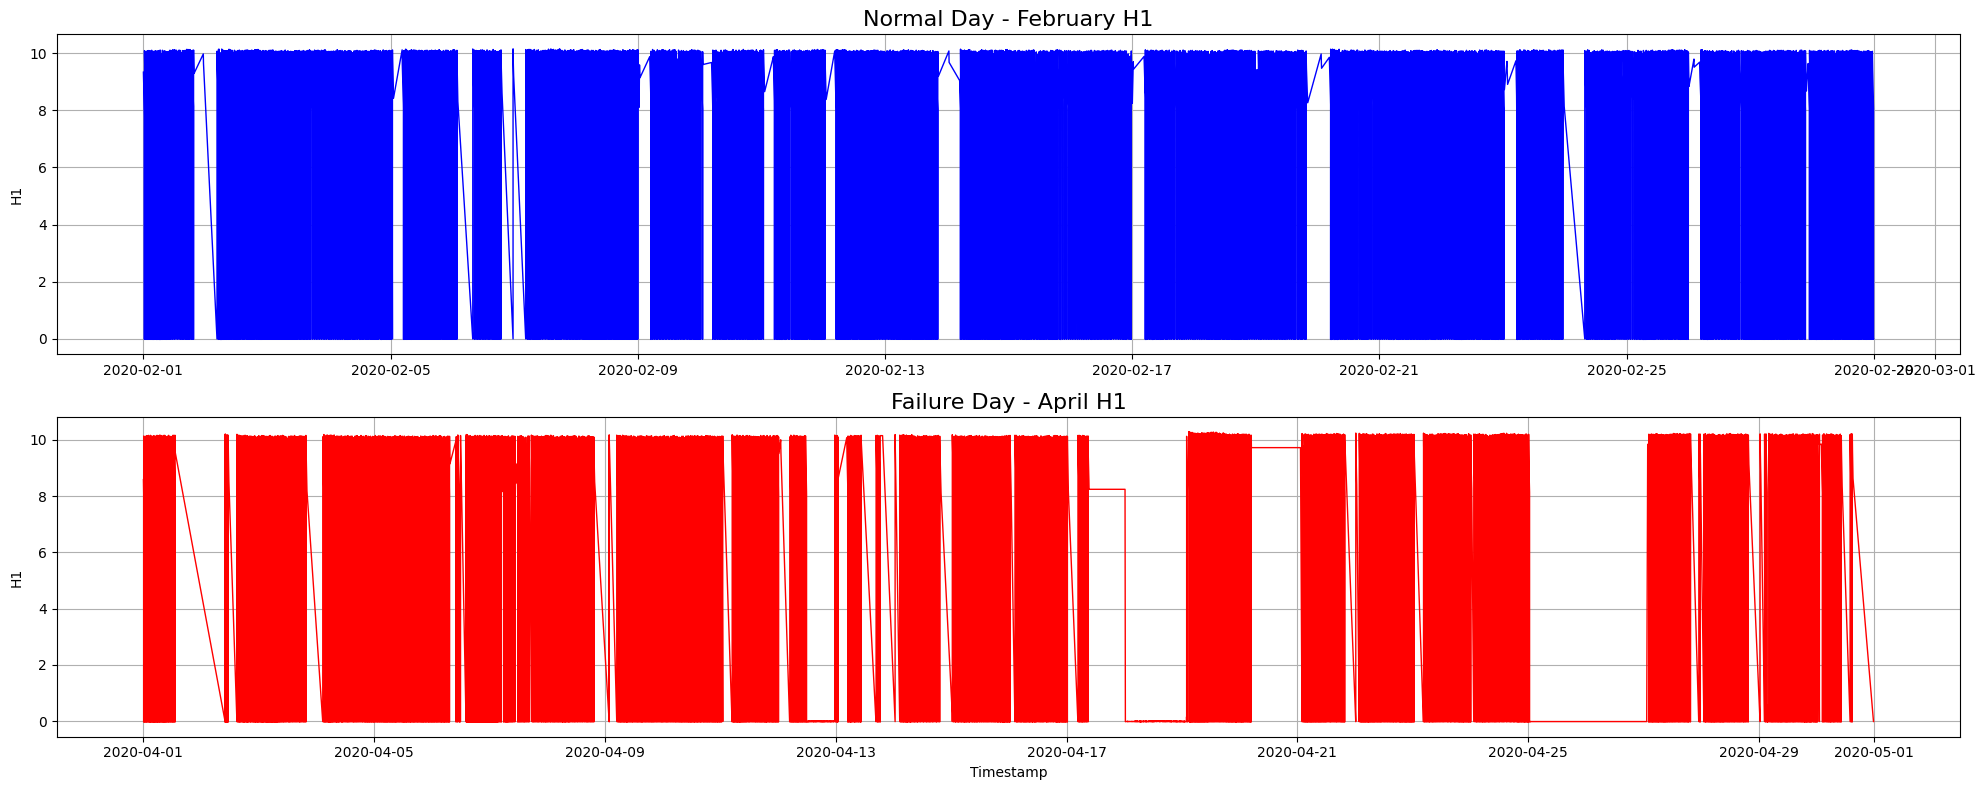

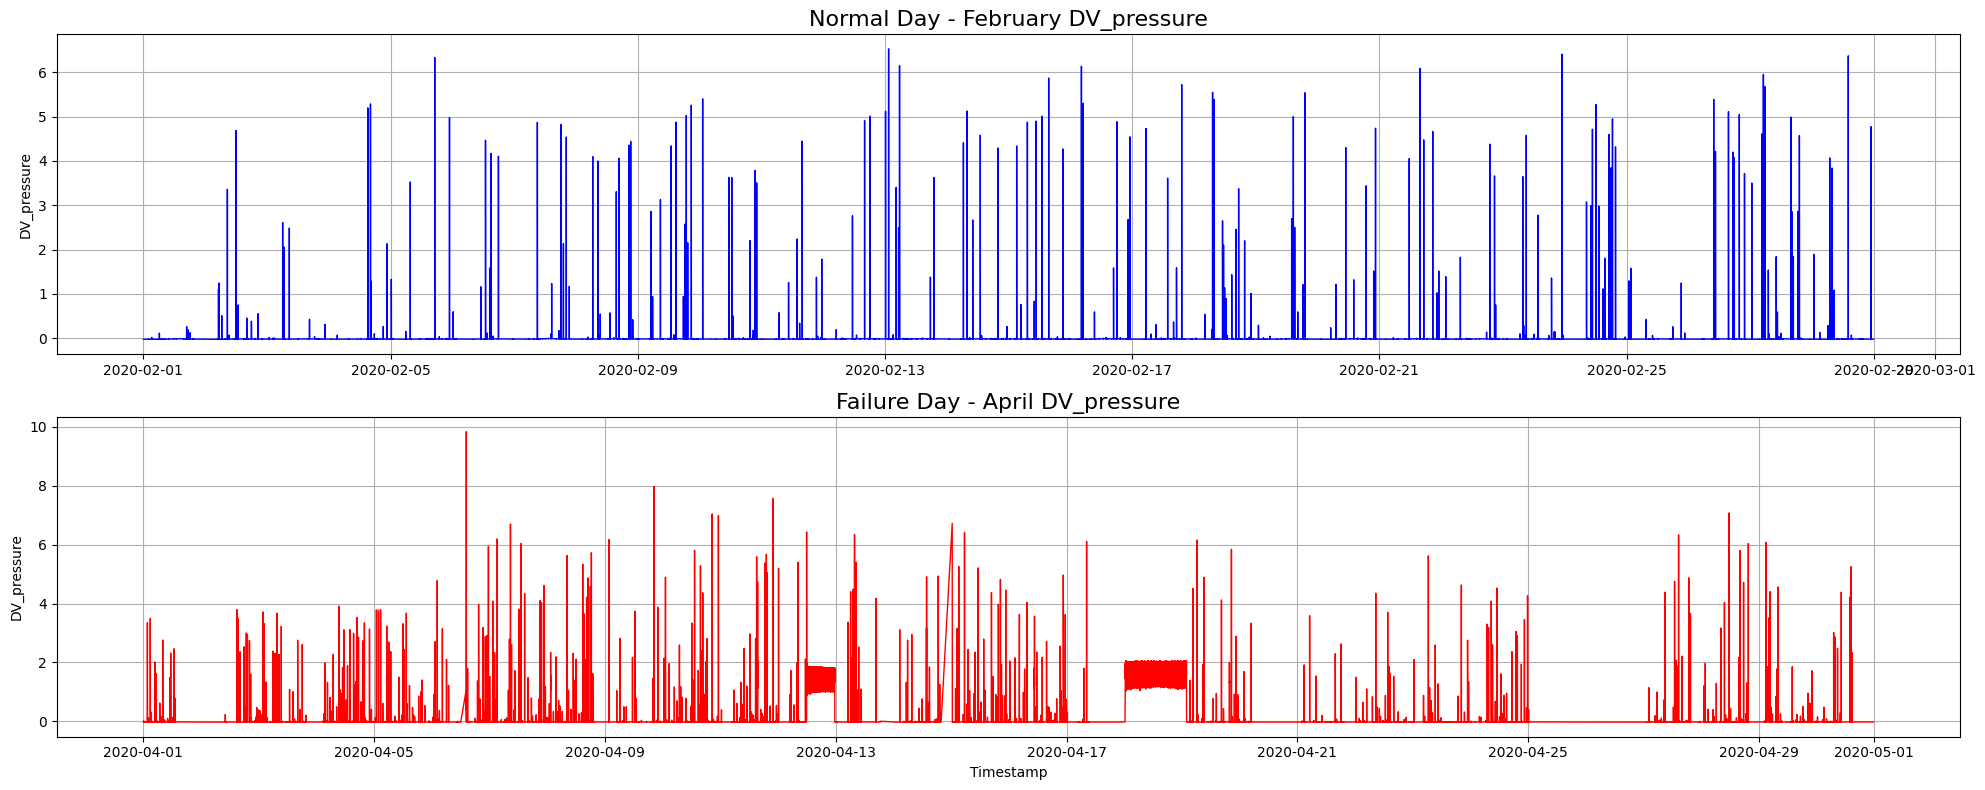

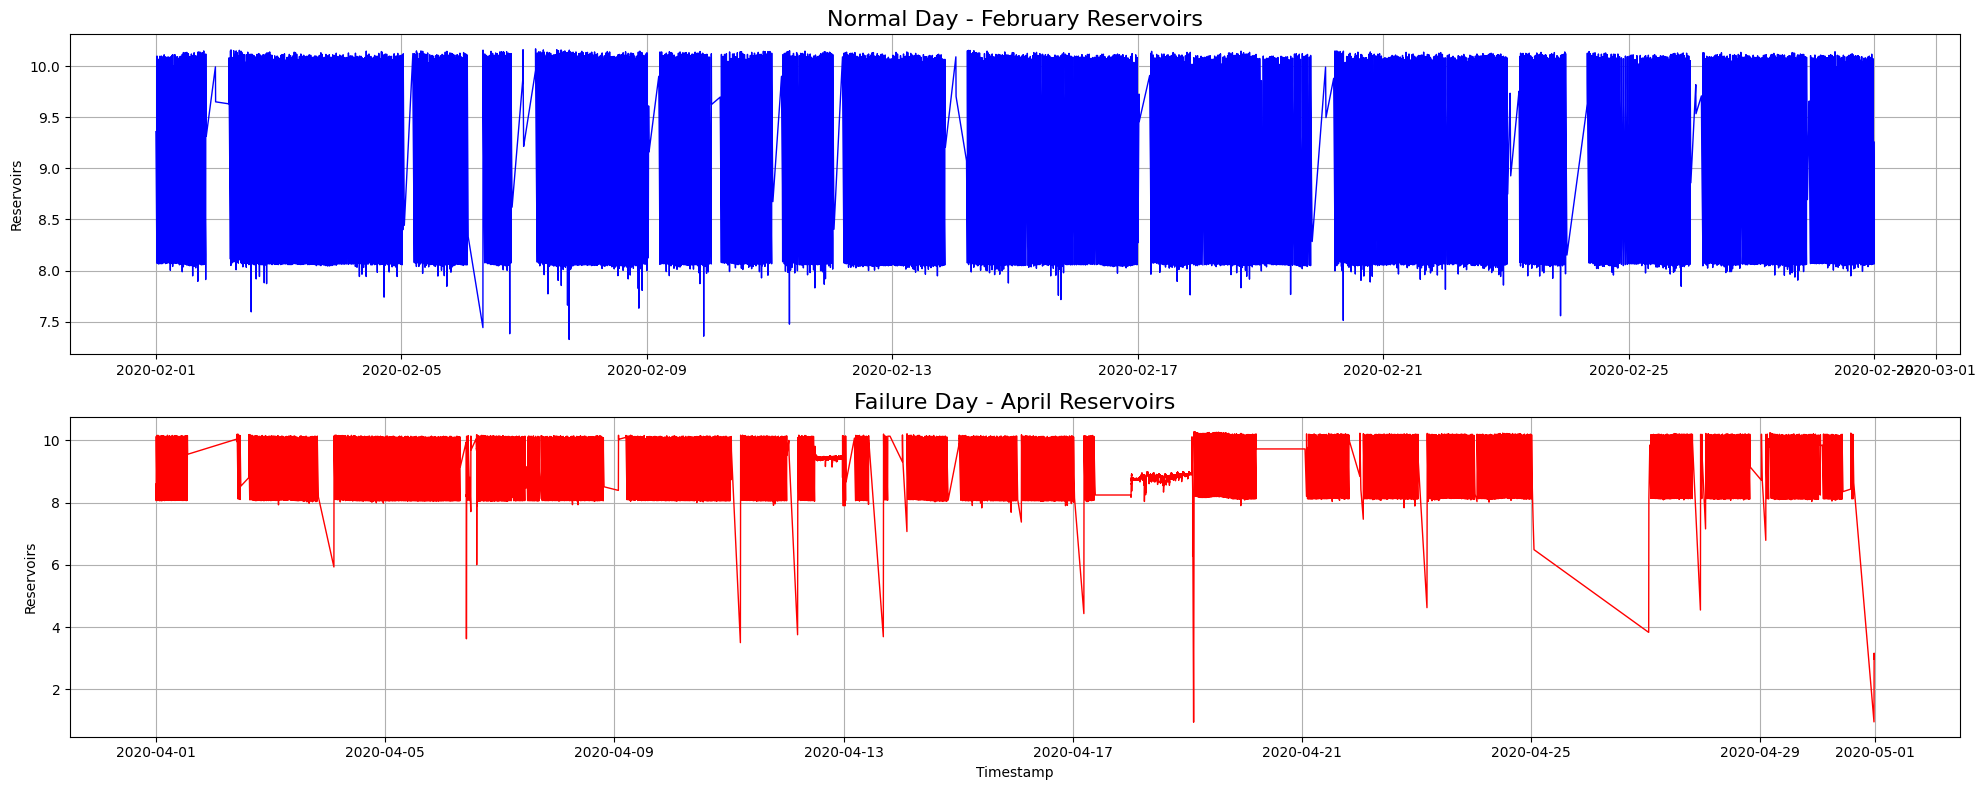

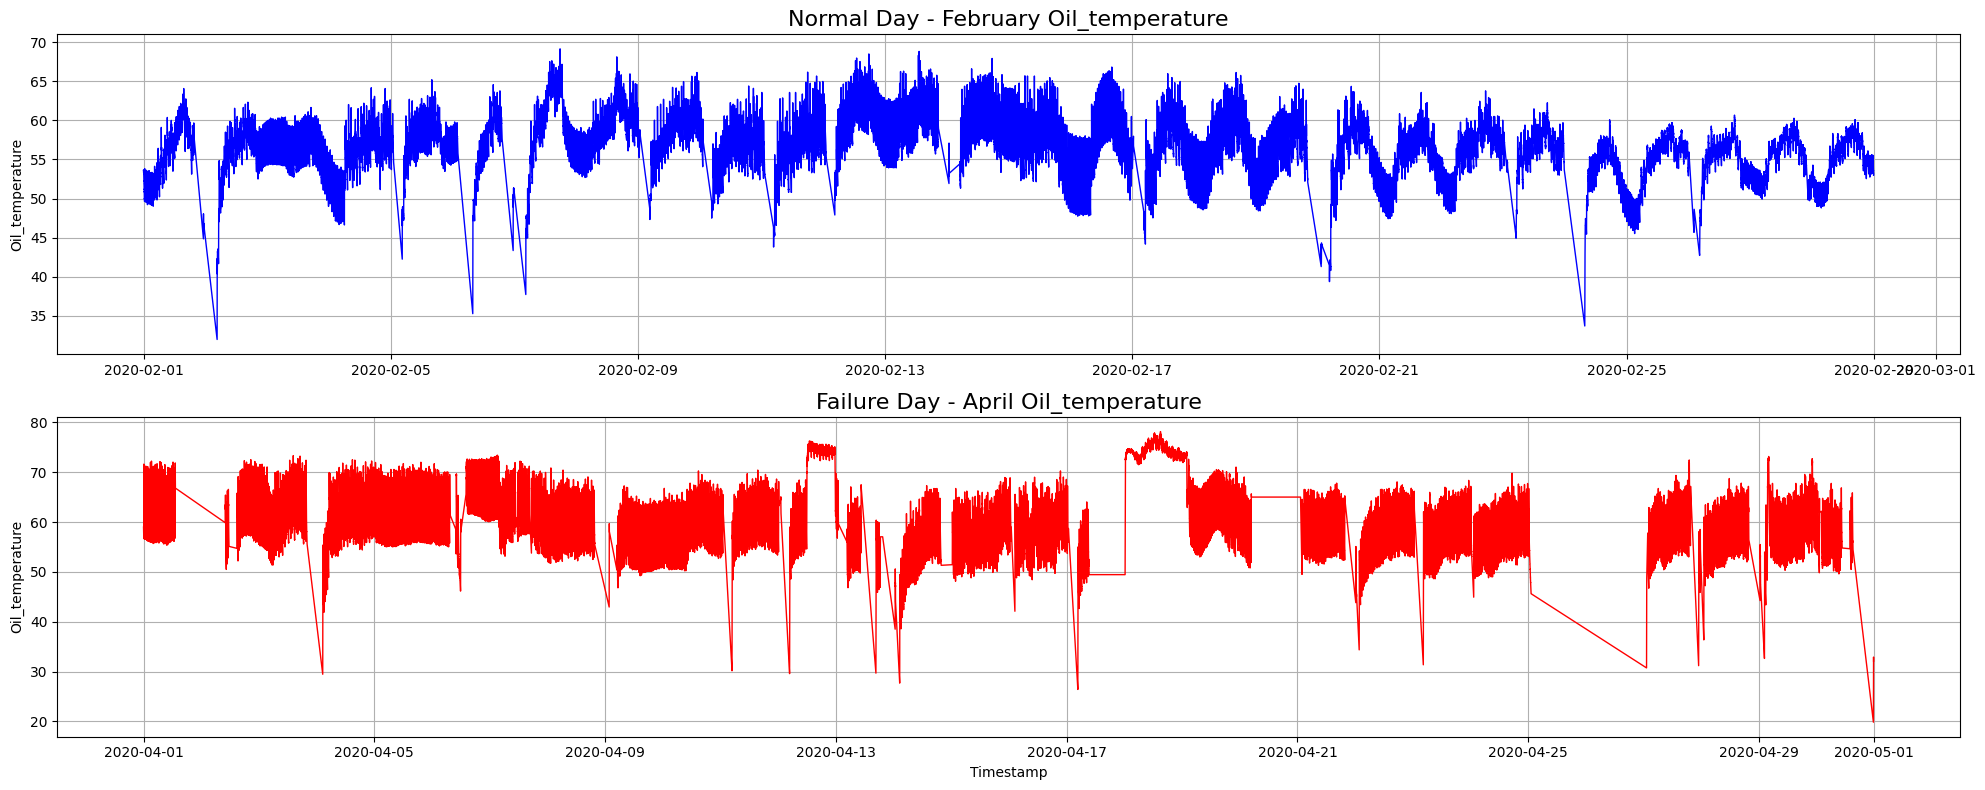

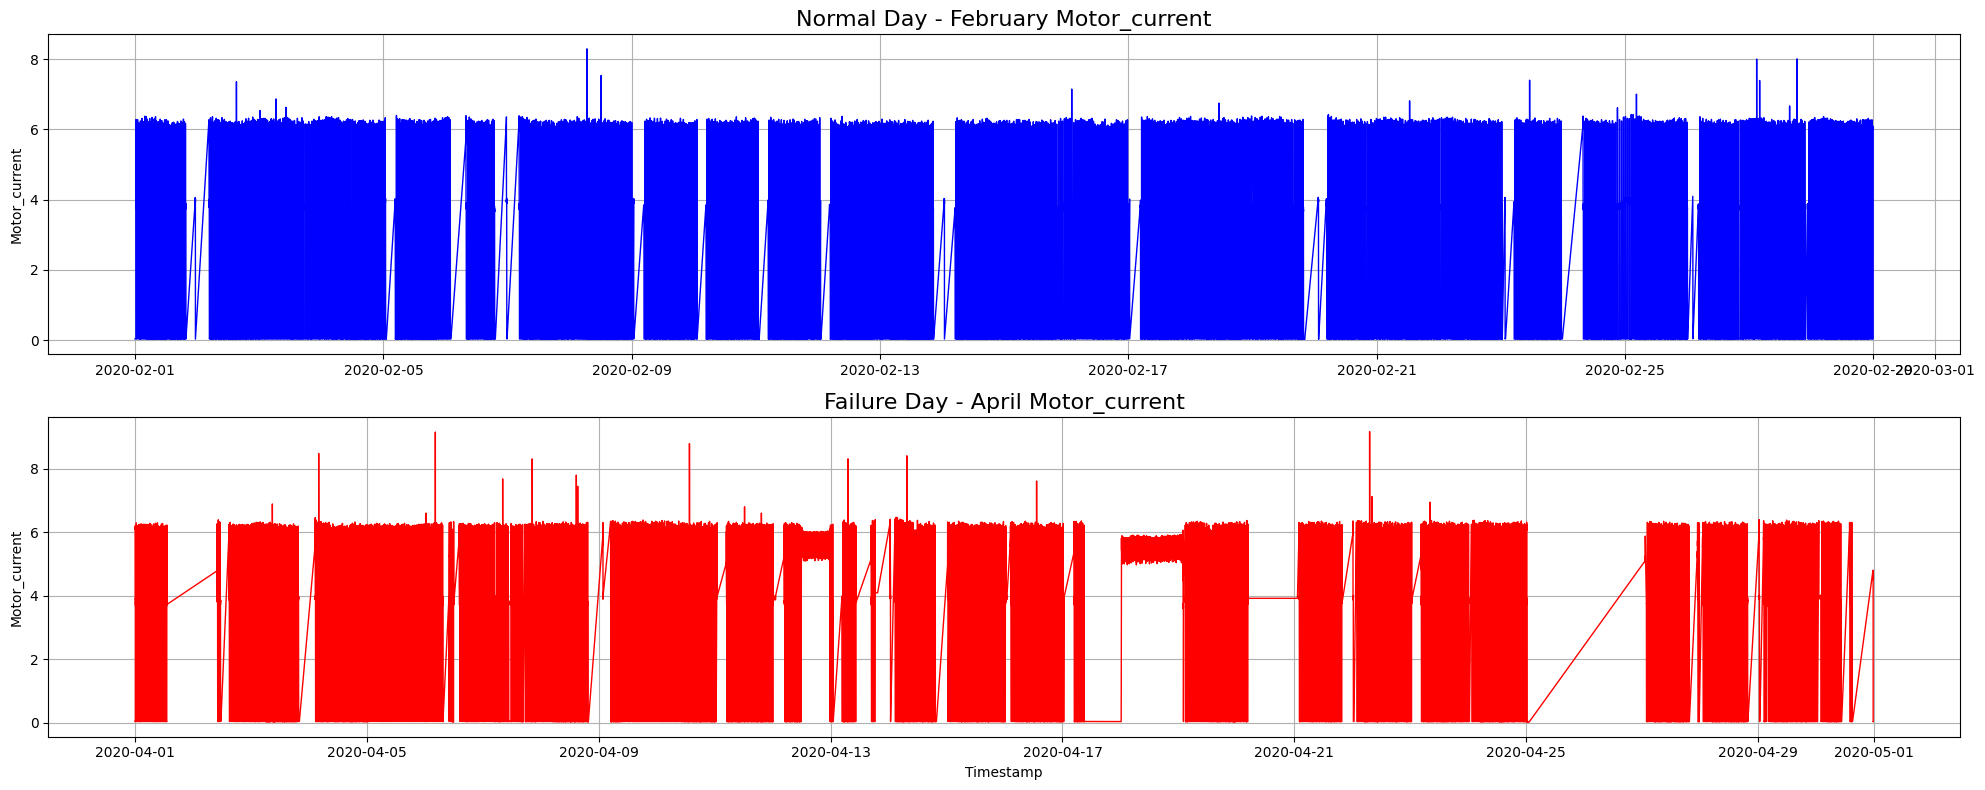

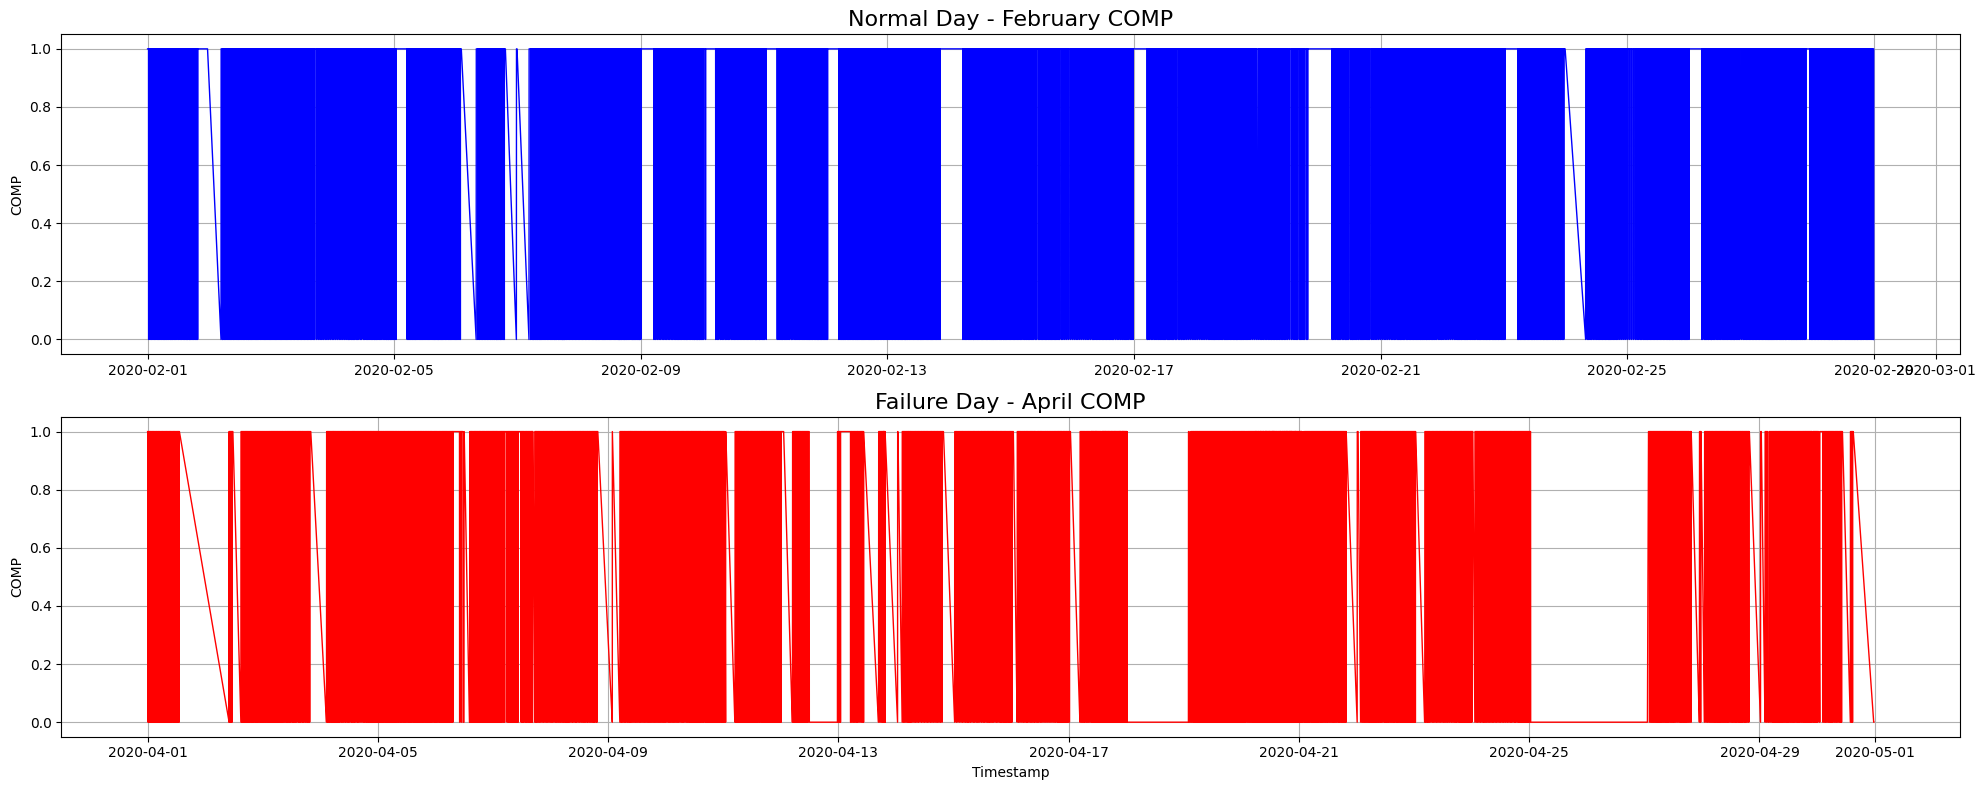

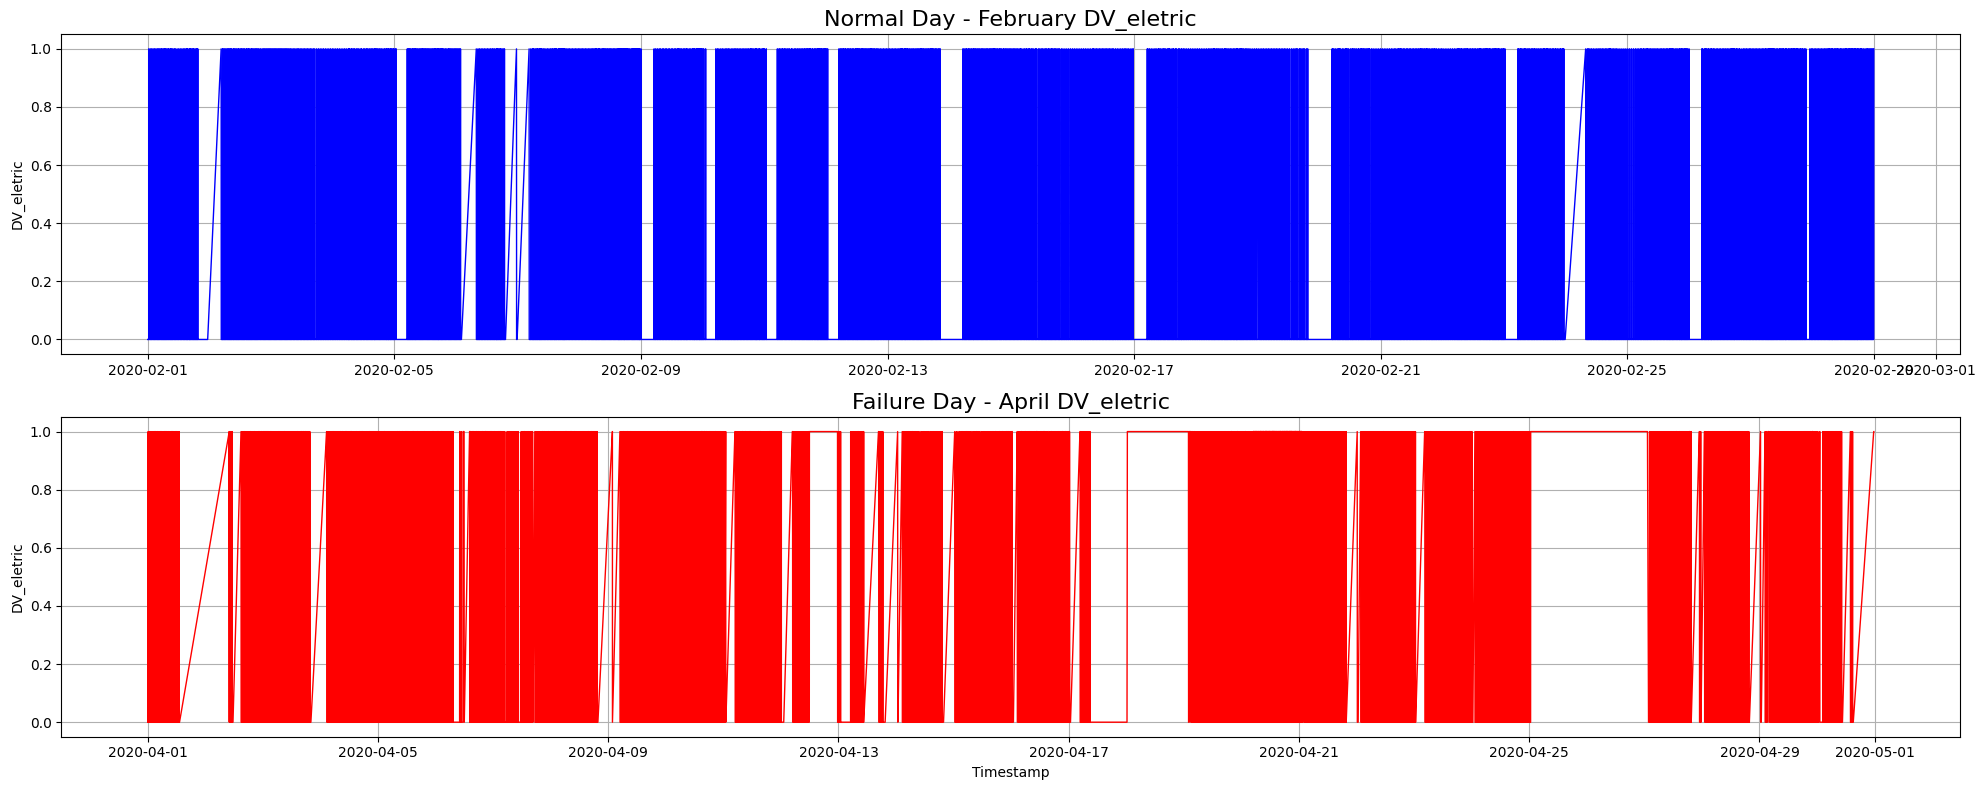

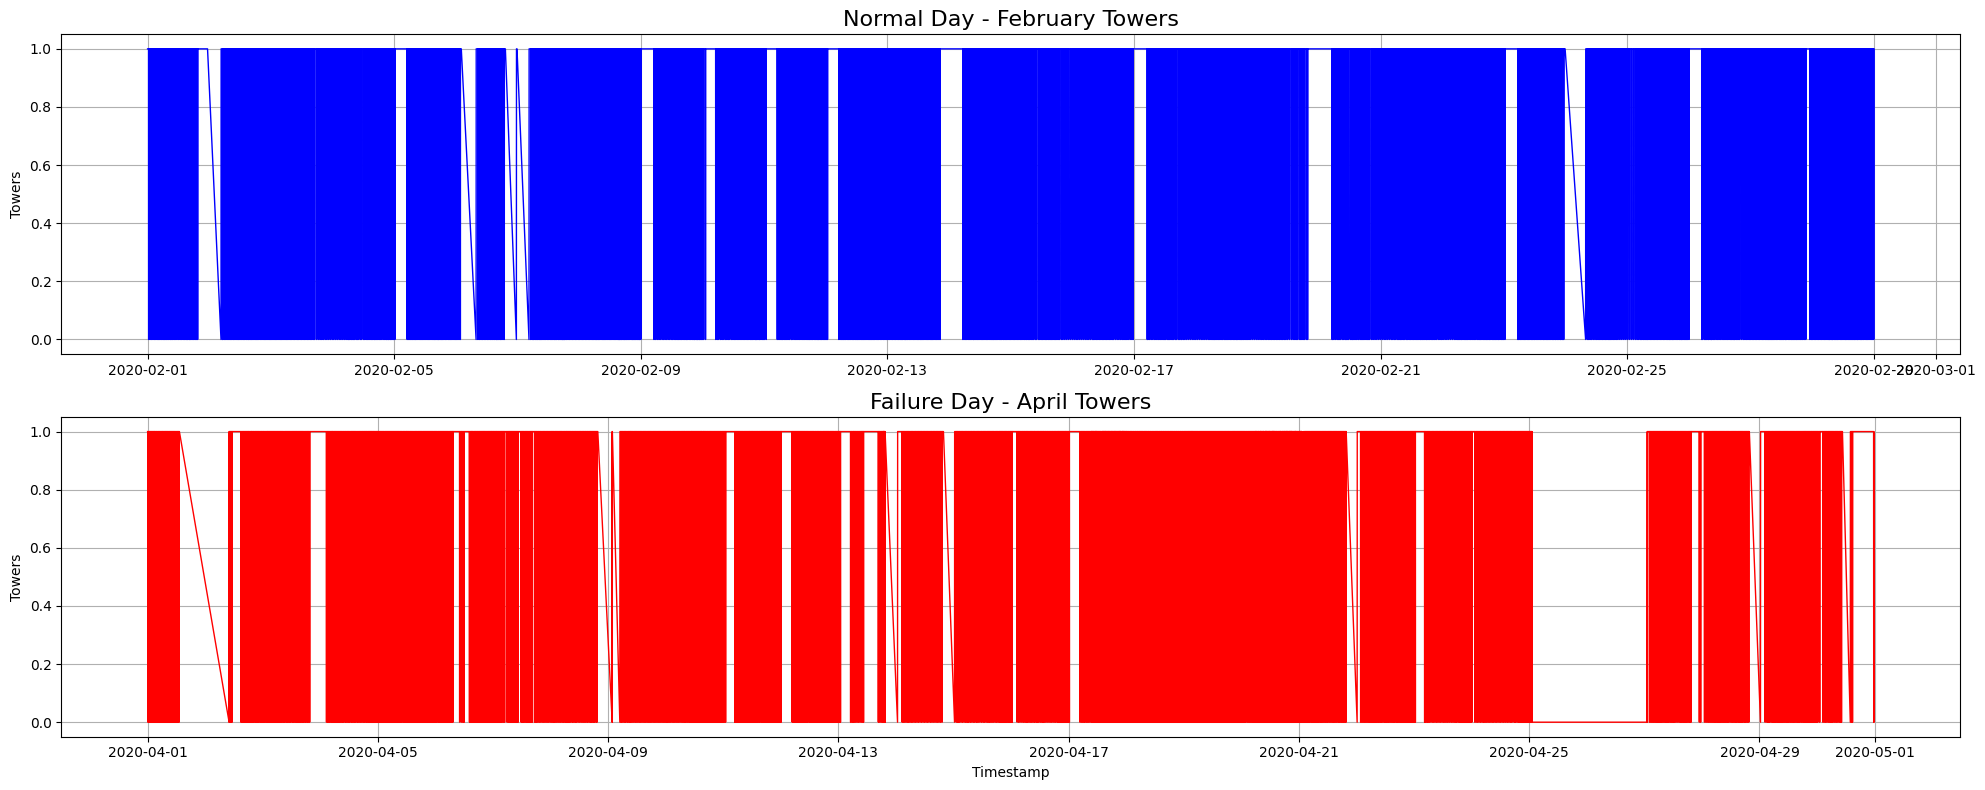

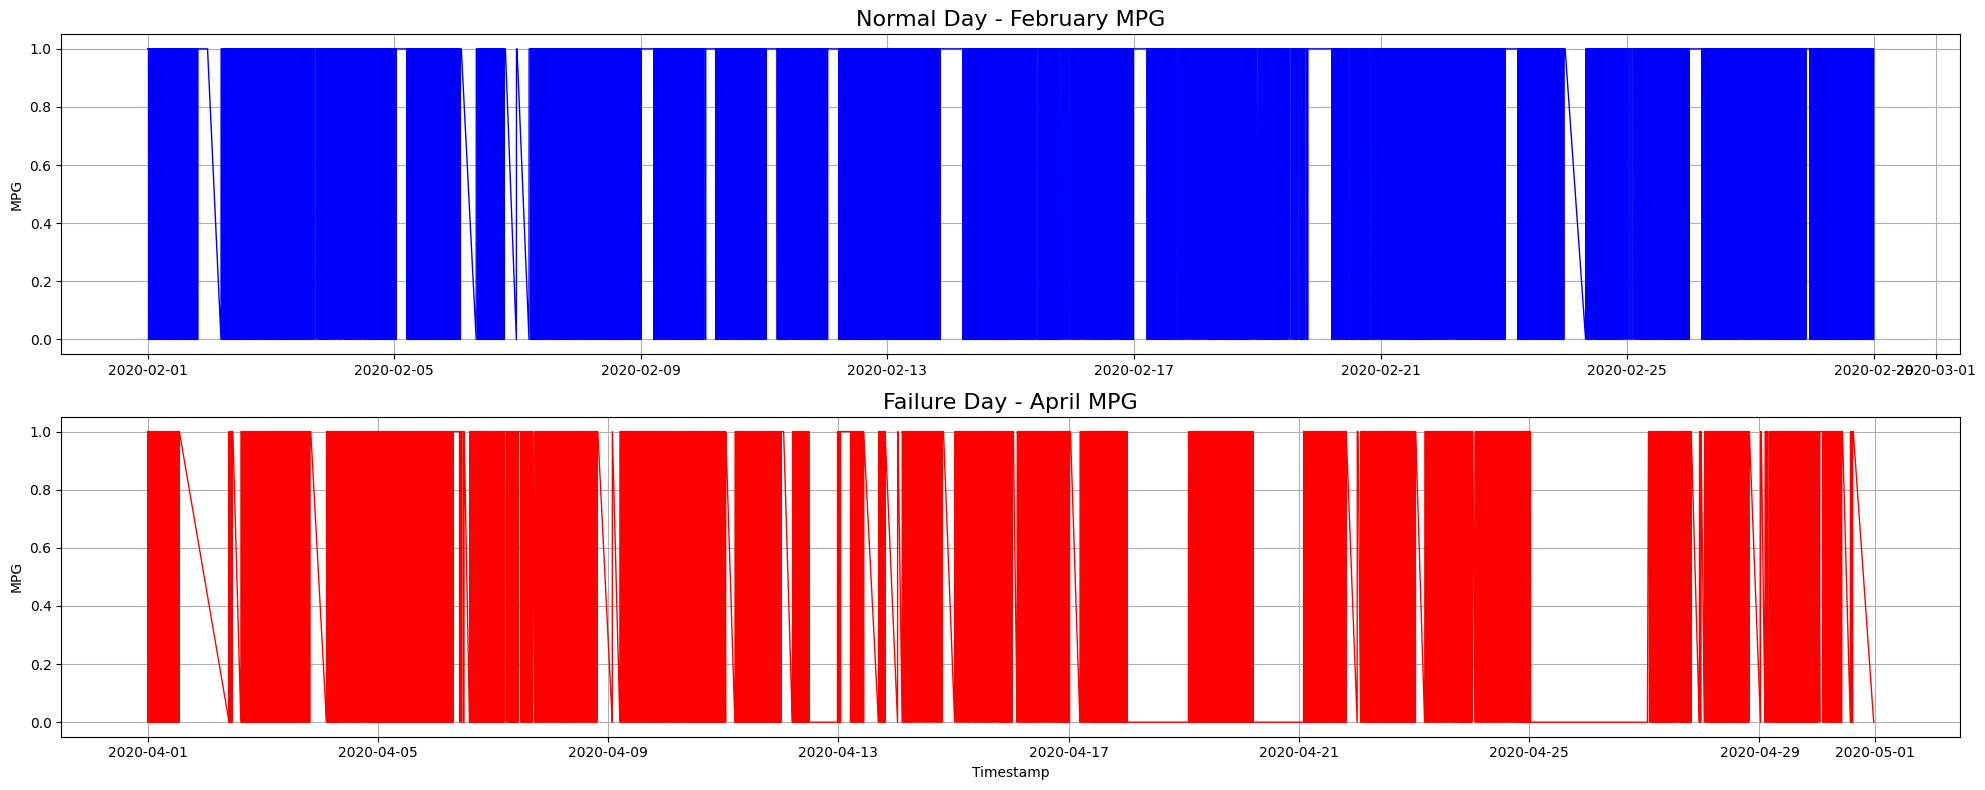

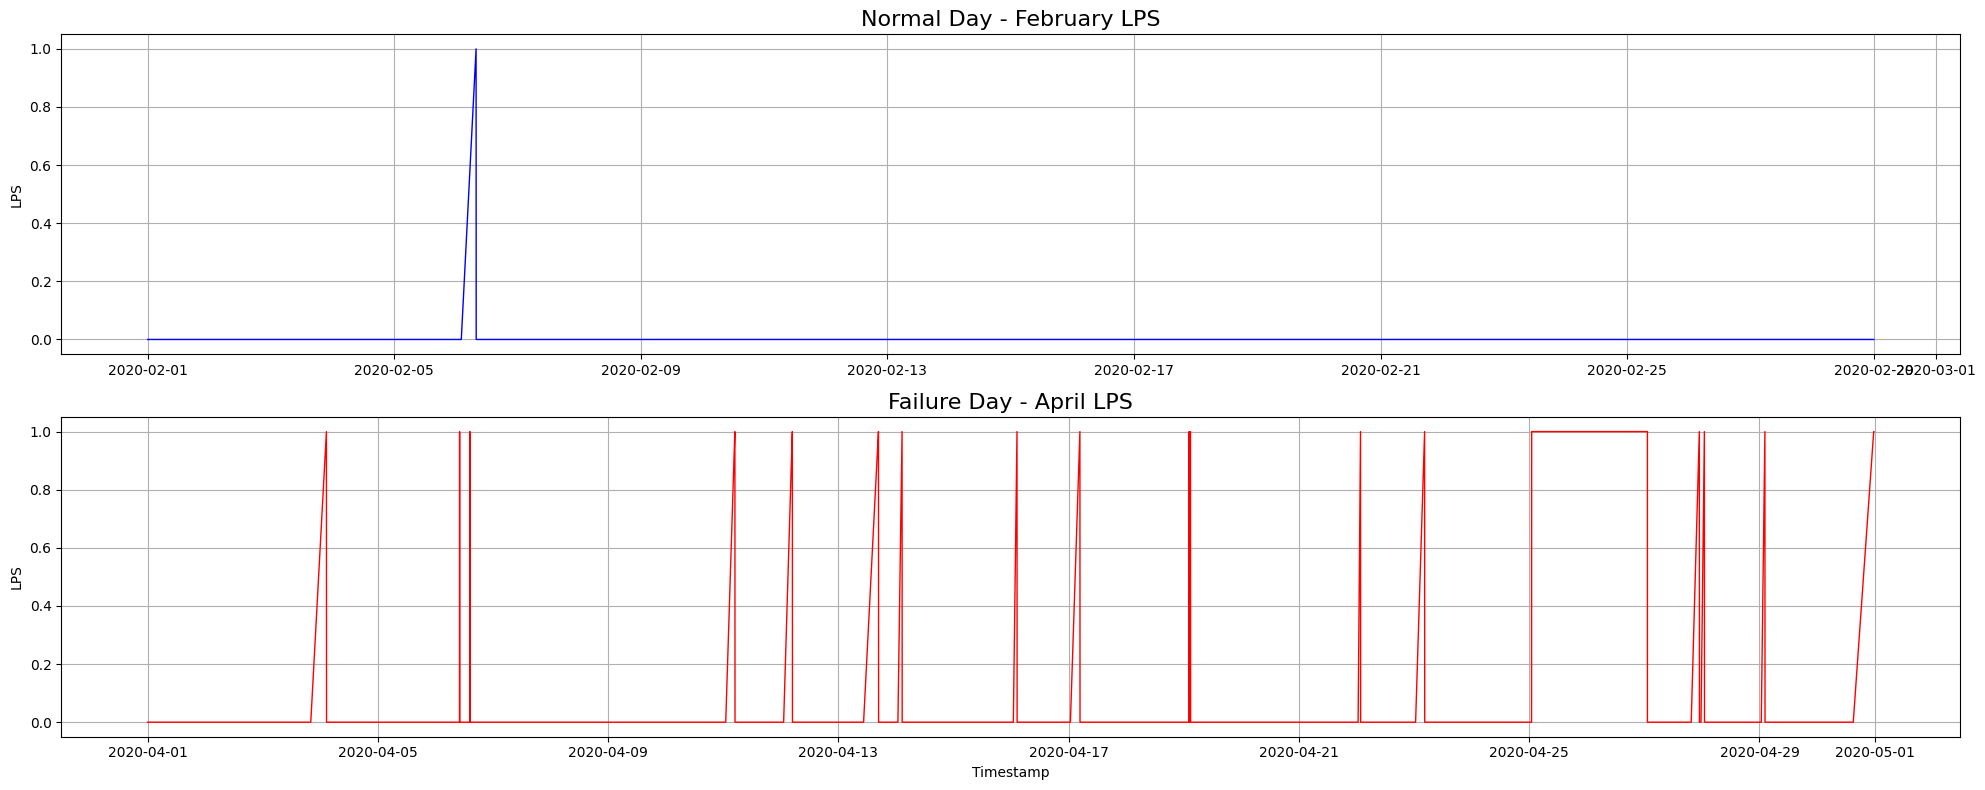

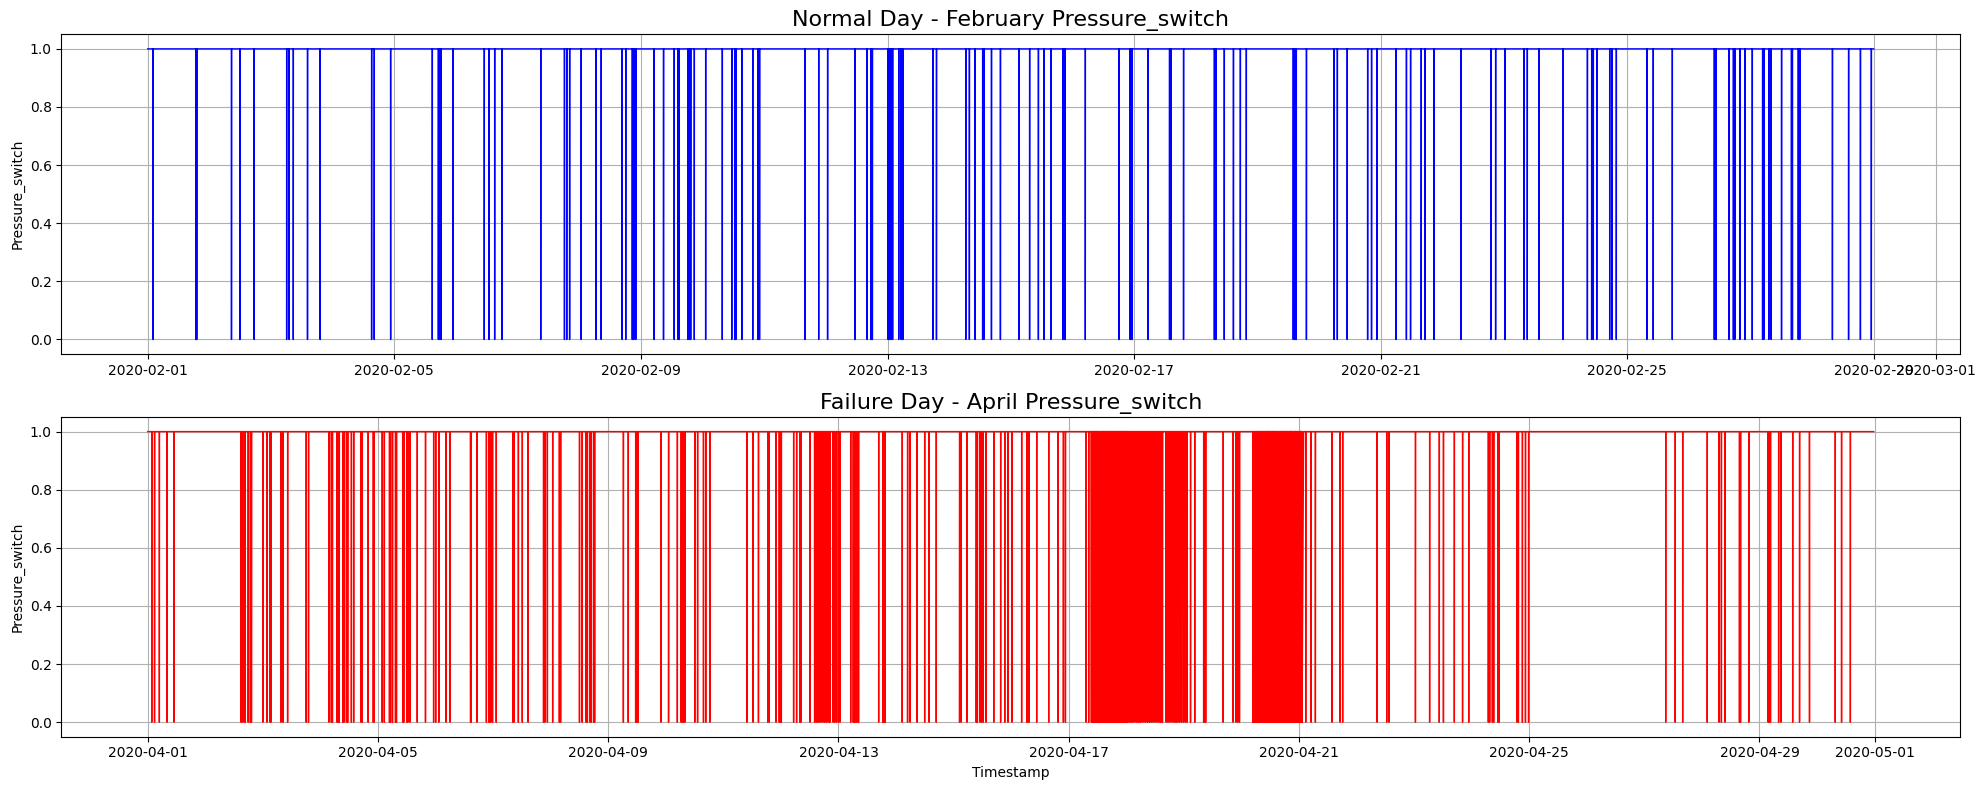

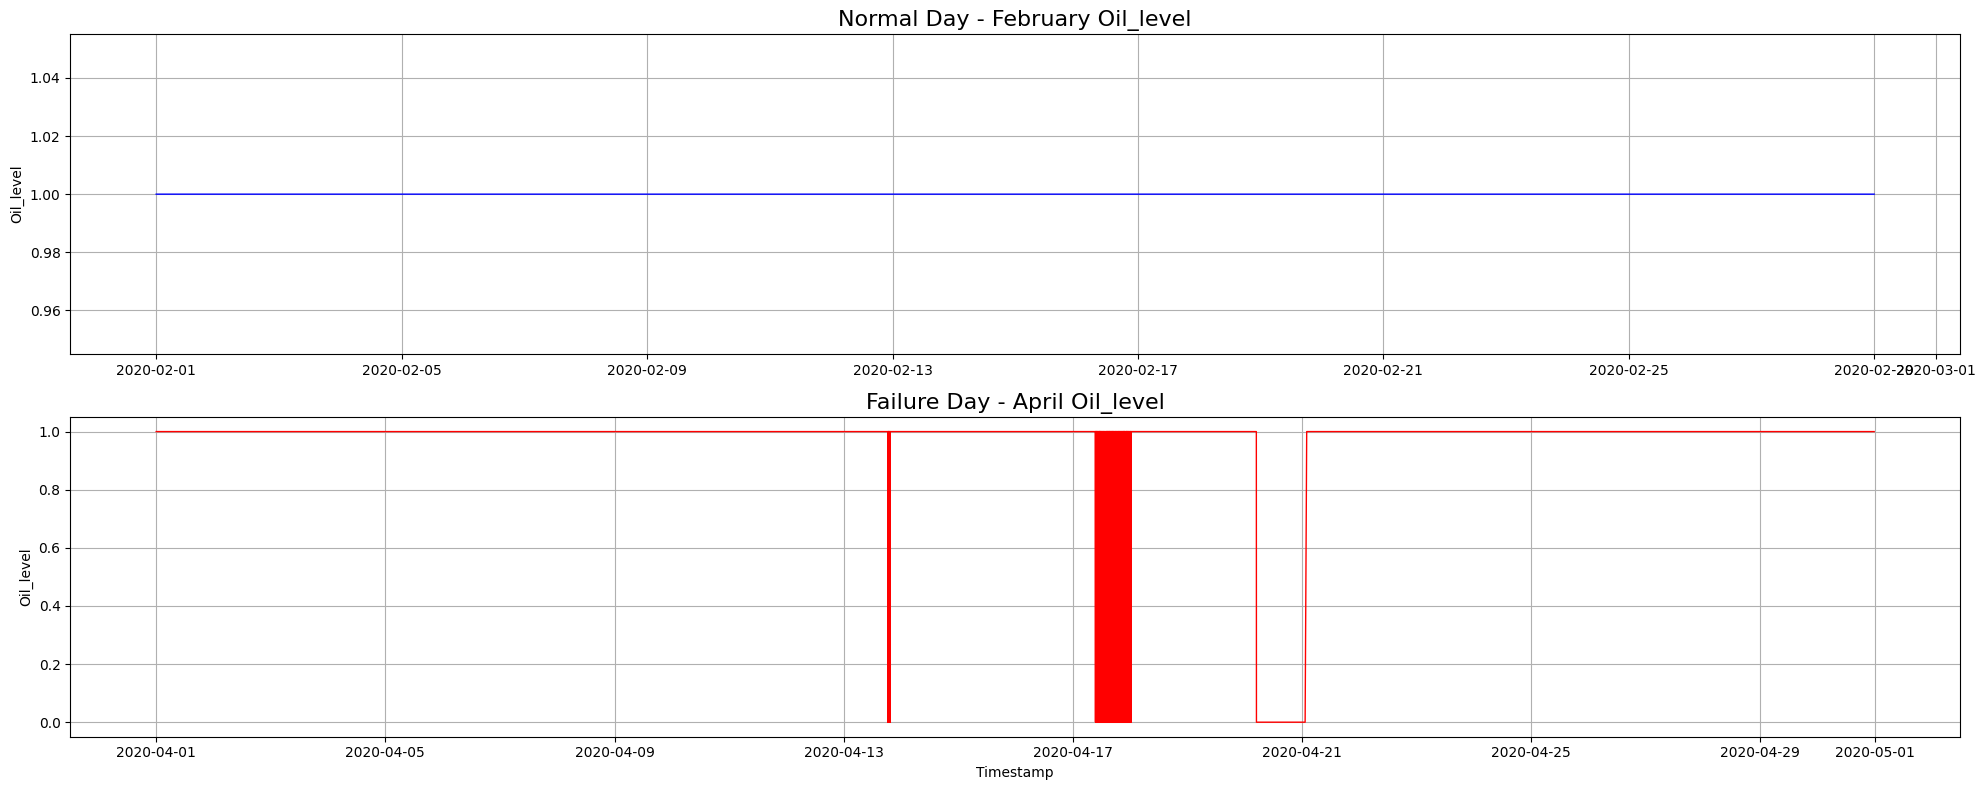

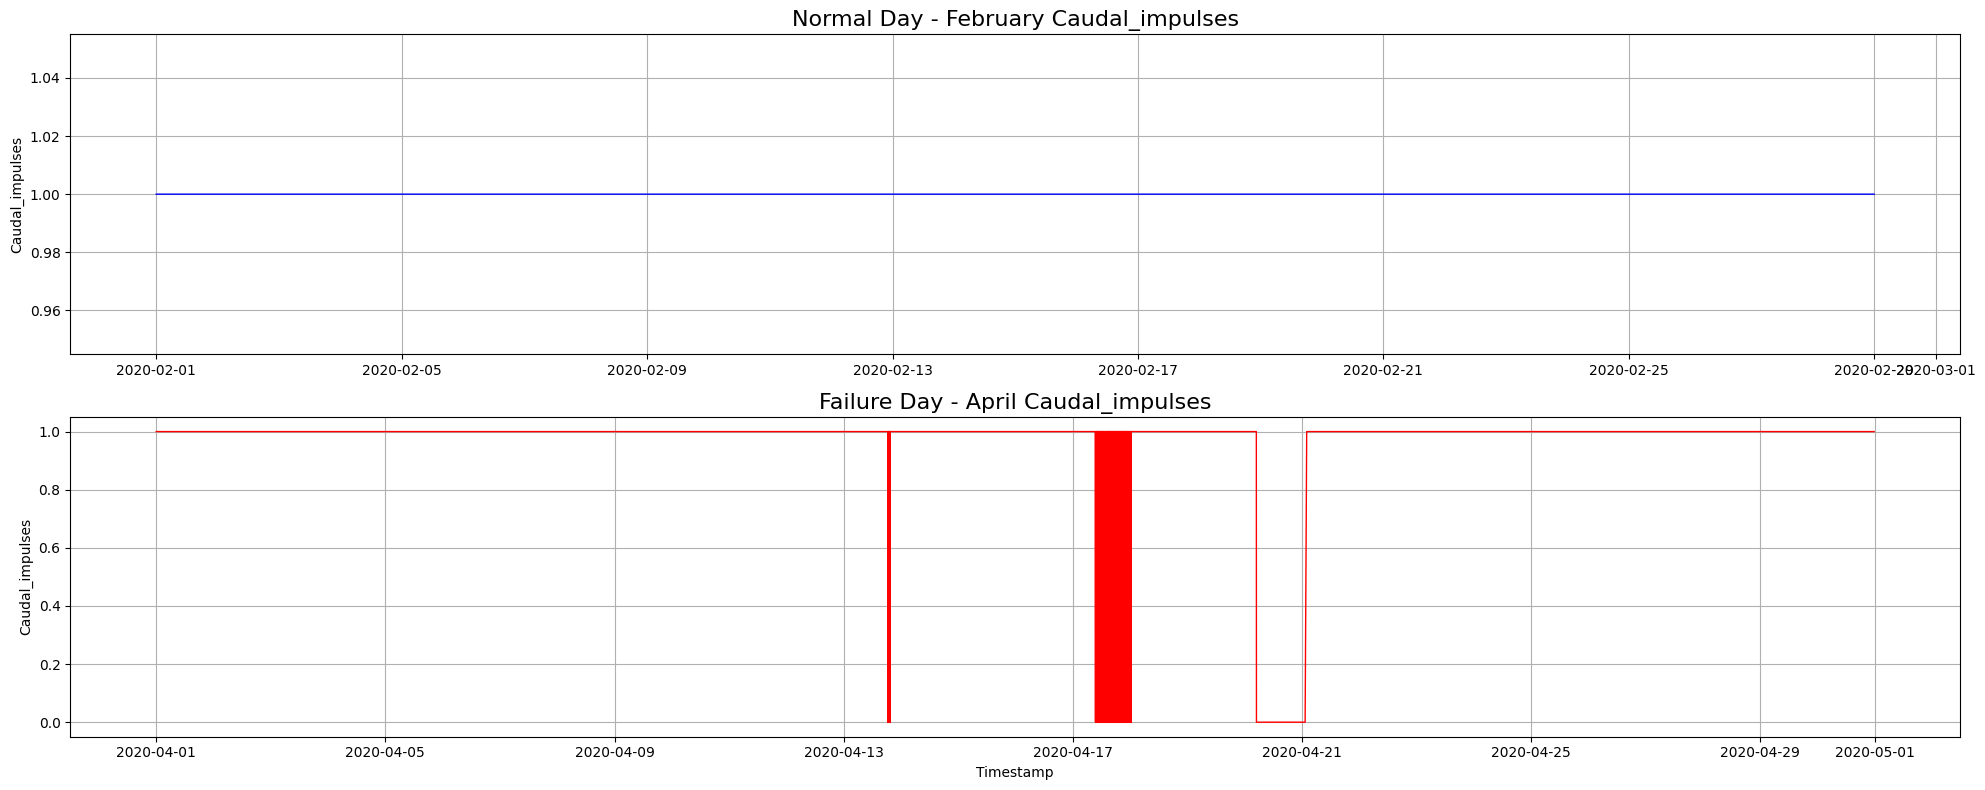

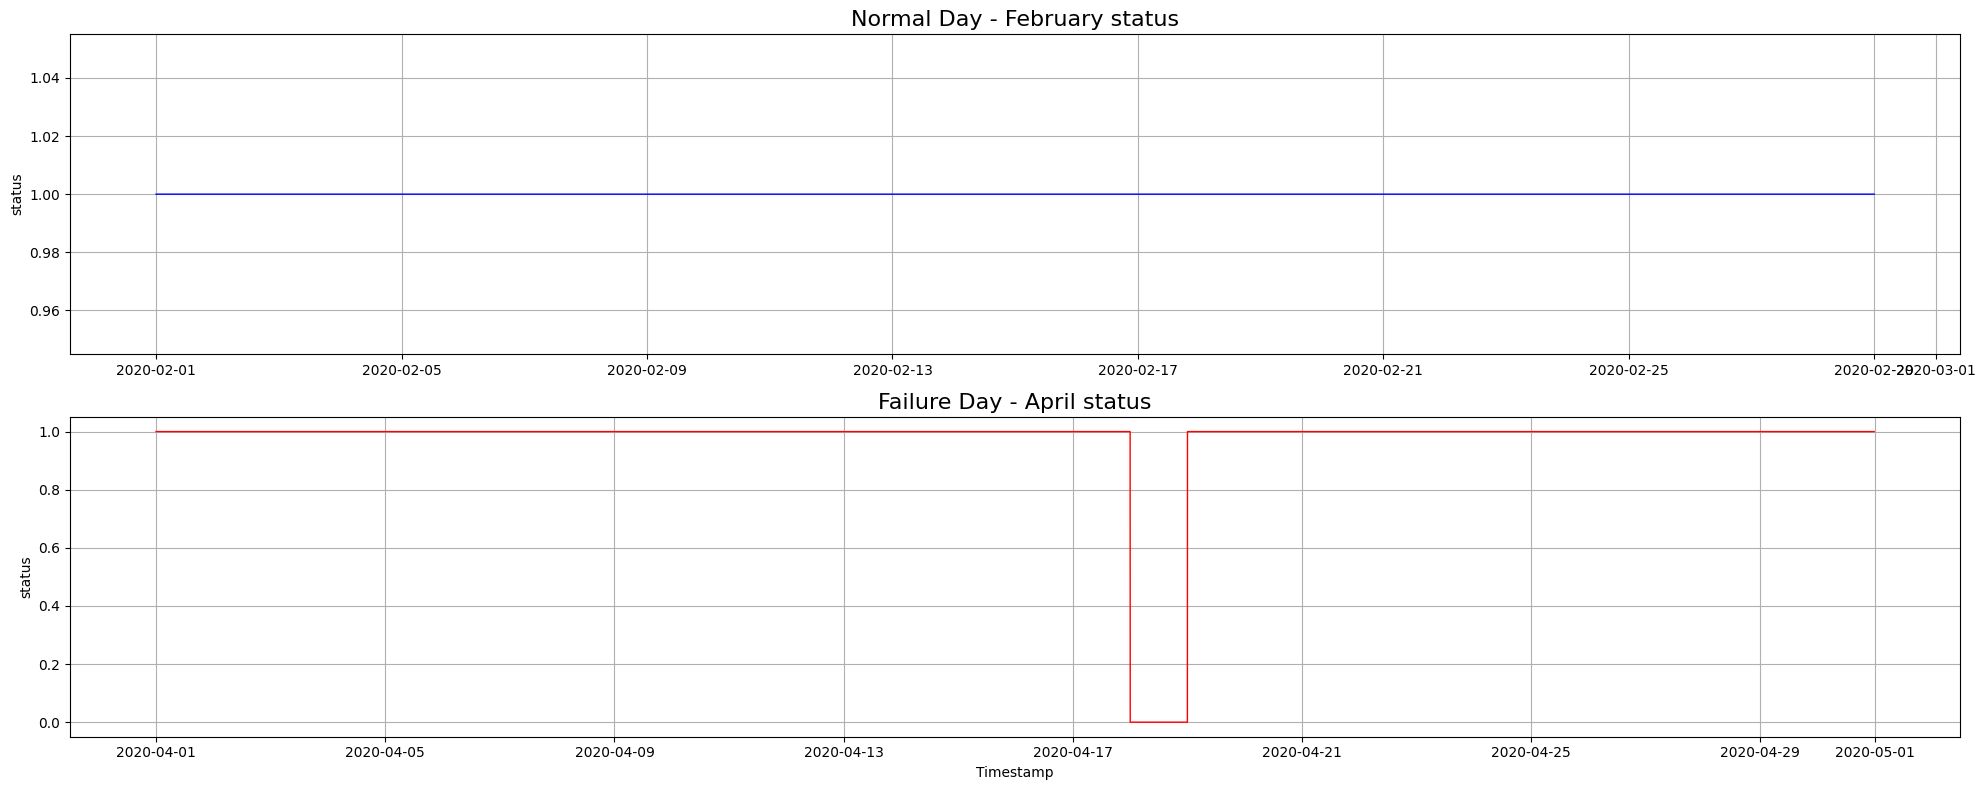

In [ ]:
import matplotlib.pyplot as plt
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter for February and April
feb_data = df[df['timestamp'].dt.month == 2]
apr_data = df[df['timestamp'].dt.month == 4]

# Get only sensor columns excluding timestamp
sensor_columns = df.columns.drop('timestamp')

# Plot each column in a separate subplot
for col in sensor_columns:
    fig, axs = plt.subplots(2, 1, figsize=(20, 8), sharex=False)

    # --- Plot for Normal ---
    axs[0].plot(feb_data['timestamp'], feb_data[col], color='blue', linewidth=1)
    axs[0].set_title(f"Normal Day - February {col}", fontsize=16)
    axs[0].set_ylabel(col)
    axs[0].grid(True)

    # --- Plot for Failure ---
    axs[1].plot(apr_data['timestamp'], apr_data[col], color='red', linewidth=1)
    axs[1].set_title(f"Failure Day - April {col}", fontsize=16)
    axs[1].set_ylabel(col)
    axs[1].set_xlabel("Timestamp")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


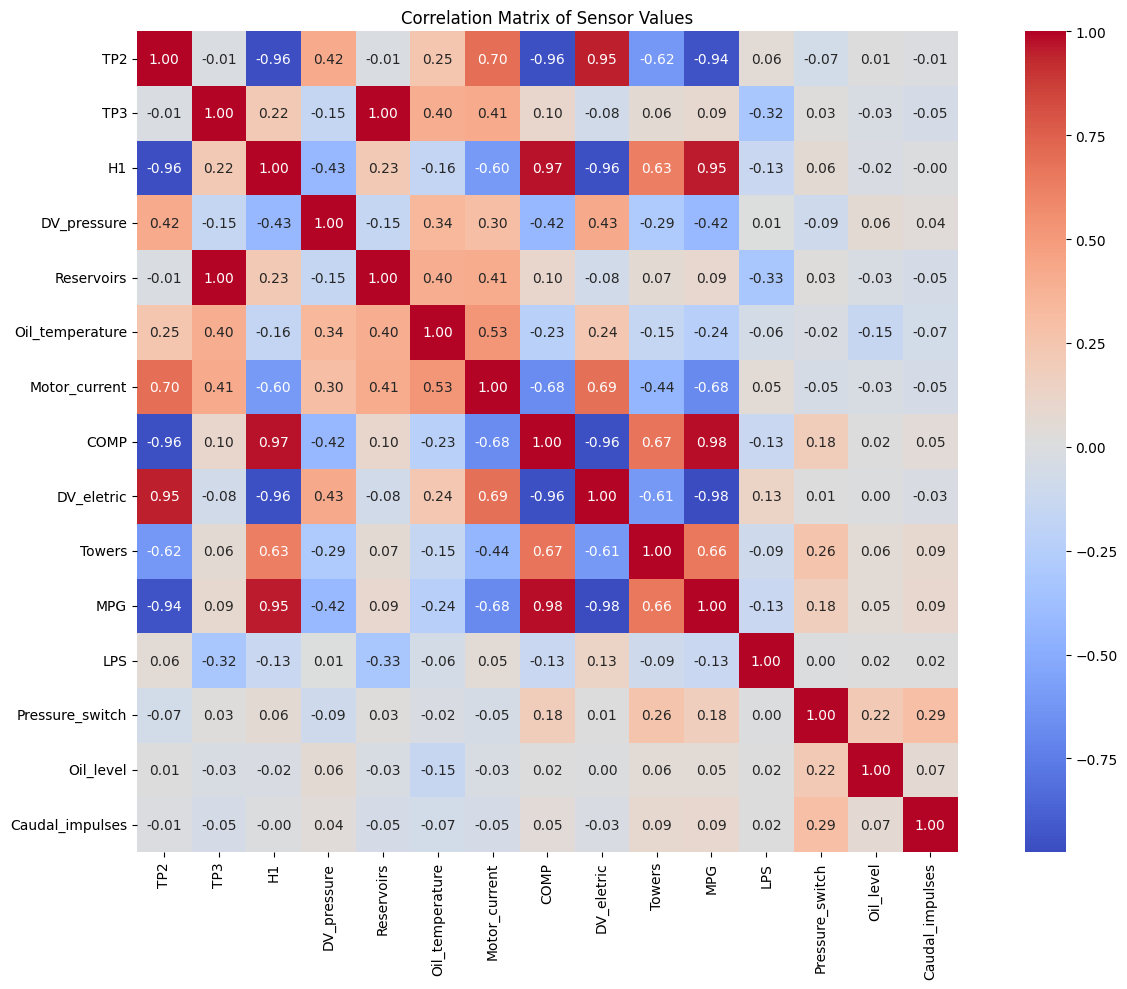

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sensor_cols = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
               'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
               'Pressure_switch', 'Oil_level', 'Caudal_impulses']

plt.figure(figsize=(14, 10))
corr = df[sensor_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Sensor Values")
plt.tight_layout()
plt.show()


In [ ]:
df.corr()['status'].sort_values(ascending=False)

,status
status,1.000000
H1,0.320653
COMP,0.319862
MPG,0.314913
Towers,0.218428
TP3,0.154689
Reservoirs,0.154688
Pressure_switch,-0.005014
timestamp,-0.018074
Caudal_impulses,-0.036379


In [ ]:
# Save the modified DataFrame to a CSV file
df.to_csv("/content/MetroPT3_status.csv", index=False)

from google.colab import files
files.download("/content/MetroPT3_status.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load your data (adjust the path as needed)
df = pd.read_csv('/content/drive/MyDrive/MetroPT3_status.csv')  # or local path

# Drop timestamp and target for features, scale features [0, 1]
features = df.drop(columns=['timestamp', 'status'])
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
def create_lstm_sequences(data, seq_length=100):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])  # next time point as target
    return np.array(X), np.array(y)
sequence_length = 100
X, y = create_lstm_sequences(features_scaled, seq_length=sequence_length)
print(X.shape, y.shape)  # (num_samples, seq_length, num_features), (num_samples, num_features)


In [ ]:
from sklearn.model_selection import train_test_split

# split the first 80% for training, rest for testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

num_features = X_train.shape[2]

model = Sequential([
    LSTM(64, input_shape=(sequence_length, num_features)),
    Dense(num_features, activation='linear')
])

model.compile(optimizer='adam', loss='mse')
model.summary()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)
mse = np.mean(np.power(y_test - y_pred, 2), axis=1)

In [ ]:
model.save('/content/drive/MyDrive/your_folder/lstm_model.h5')

In [ ]:
# Set threshold
threshold = np.percentile(mse, 95)

# Flag anomalies
anomalies = mse > threshold
print(f"Threshold: {threshold}")
print(f"Number of anomalies detected: {np.sum(anomalies)}")



In [ ]:
# Evaluate if test status labels are available
status_labels = df['status'].values[split+sequence_length:]
from sklearn.metrics import classification_report
print(classification_report(status_labels, anomalies.astype(int)))

In [ ]:
# taking first 10 sequences from test set (X_test)
batch_input = X_test[:10]  # shape: (10, 100, num_features)

predictions = model.predict(batch_input)  # shape: (10, num_features)

print(predictions)
